# Task 4 - To Explore Decision Tree Algorithm


For the given ‘Iris’ dataset, create the Decision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.



## Importing Libraries

In [1]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt  # for data visualization
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns  # for data visualization

## Loading Datasets

In [2]:
data = sns.load_dataset('iris')

In [3]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
data.shape

(150, 5)

## Exploratory Data Analysis

In [5]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


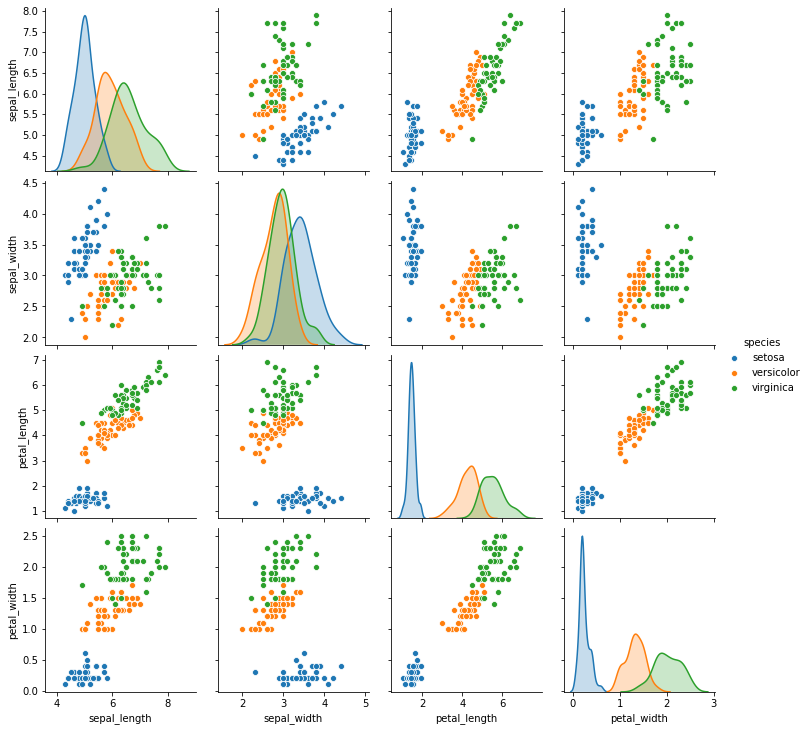

In [7]:
sns.pairplot(data=data,hue='species')

In [8]:
data.isna().any()

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False
dtype: bool

In [9]:
x = data.iloc[:,0:4]
y = data.values[:,-1]

In [10]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
y = data.values[:,-1]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split
#splitting data into testing data and training data
x_train, x_test, y_train, y_test = train_test_split(x,y)

## Training Decision Tree Classifier

In [13]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [14]:
y_prediction = model.predict(x_test)
d = pd.DataFrame({'Predicted' : y_prediction,'y_test' : y_test})
d

,Predicted,y_test
0,1,1
1,1,1
2,2,2
3,1,1
4,2,2
5,2,1
6,1,1
7,0,0
8,0,0
9,0,0


## Metric Evaluation

### Making the Confusion Matrix

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_prediction)
print(cm)

[[12  0  0]
 [ 0 16  2]
 [ 0  0  8]]


<AxesSubplot:>

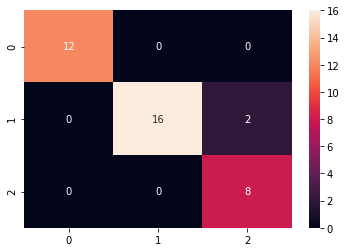

In [16]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

## Classification Report

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.89      0.94        18
           2       0.80      1.00      0.89         8

    accuracy                           0.95        38
   macro avg       0.93      0.96      0.94        38
weighted avg       0.96      0.95      0.95        38



## Model Accuracy

In [18]:
from sklearn import metrics
print("The accuracy of the Decision Tree is","{:.3f}".format(metrics.accuracy_score(y_prediction,y_test)))

The accuracy of the Decision Tree is 0.947


In [19]:
from sklearn.tree import plot_tree

## Visualizing the Decision Tree

[Text(334.8, 1223.1, 'petal_width <= 0.8\ngini = 0.663\nsamples = 112\nvalue = [38, 32, 42]\nclass = virginica'),
 Text(167.4, 951.3, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]\nclass = setosa'),
 Text(502.20000000000005, 951.3, 'petal_length <= 4.95\ngini = 0.491\nsamples = 74\nvalue = [0, 32, 42]\nclass = virginica'),
 Text(334.8, 679.5, 'petal_width <= 1.65\ngini = 0.234\nsamples = 37\nvalue = [0, 32, 5]\nclass = versicolor'),
 Text(167.4, 407.69999999999993, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]\nclass = versicolor'),
 Text(502.20000000000005, 407.69999999999993, 'sepal_width <= 3.1\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]\nclass = virginica'),
 Text(334.8, 135.89999999999986, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]\nclass = virginica'),
 Text(669.6, 135.89999999999986, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(669.6, 679.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 0, 37]\nclass = virginica')]

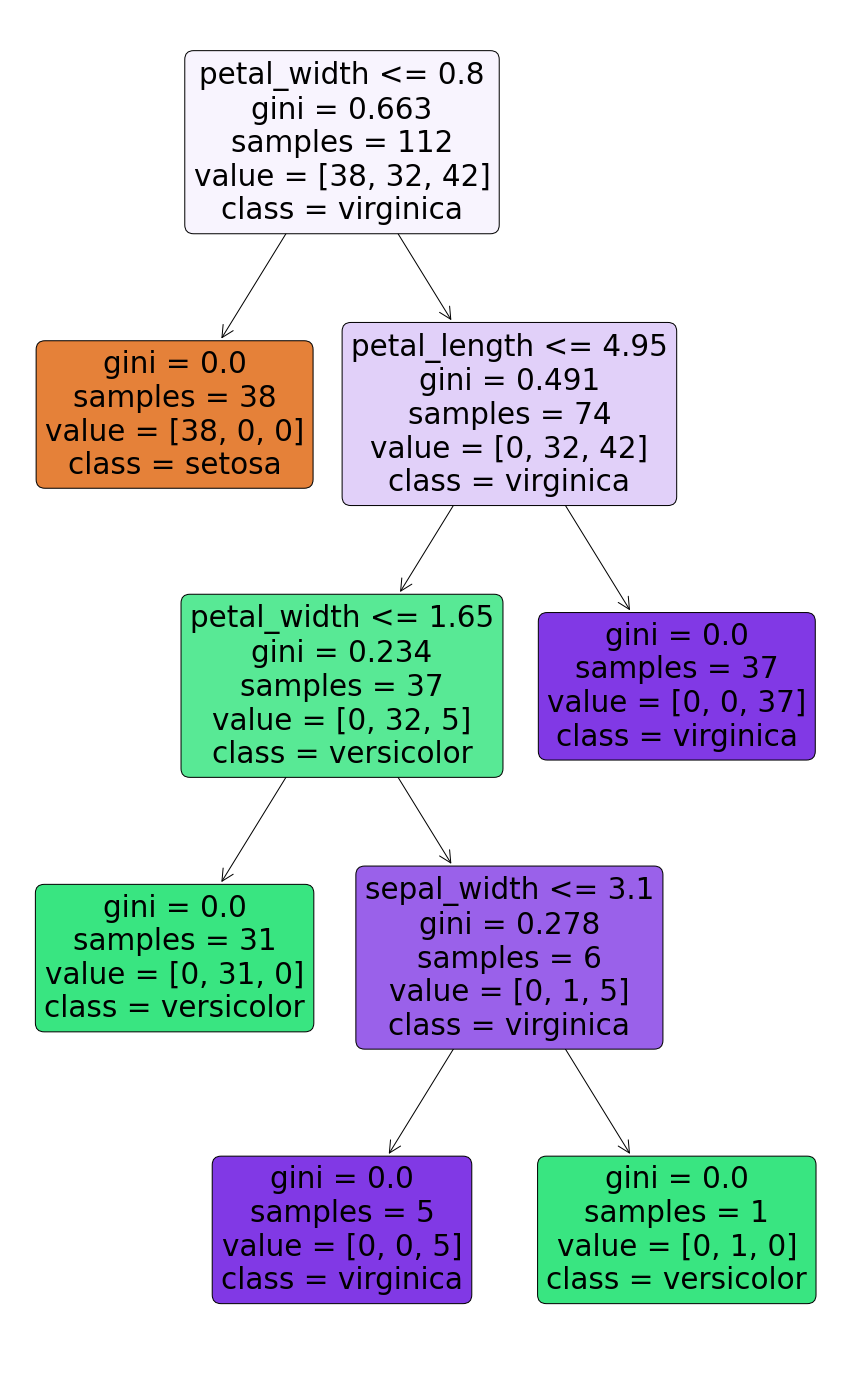

In [20]:
plt.figure(figsize=(15,25))
plot_tree(model, feature_names=x_train.columns,class_names=['setosa', 'versicolor', 'virginica'], filled=True, rounded=True )